In [210]:
# Importing libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea

# to ignore stupid warnings
import warnings
warnings.filterwarnings("ignore")

# importing library for webs Scraping
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [211]:
# Creating an array of all the students roll numbers including lateral enteries
normal_students = np.arange(160920733001, 160920733180)
lateral_entry = np.arange(160920733301, 160920733320)

In [212]:
# Combining both the arrays into one
total_students = np.concatenate((normal_students, lateral_entry), axis=0)

# Removing roll numbers of students that discontionued and whose roll nunbers cannot be found on the webite
total_students = total_students[total_students != 160920733156]

In [213]:
# Creating a dictionary that maps the subject code to subject
subject_dic = {
    "502N" : "Computer Networks Lab",
    "502O" : "Artificial Intelligence Lab",
    "574" : "Software Engineering Lab",
    "585": "Artificial Intelligence",
    "503I": "Object Oriented Analysis Design",
    "518" : "Automata Language Computation",
    "535" : "Software Engineering",
    "538" : "Computer Networks",
    "503F" : "Principals of Programming Language"
}

In [214]:
# Creating an empty dataframe whose columns are the subject names of the semester  

results_df = pd.DataFrame(index=total_students)
results_df.index.name = "Roll Number"
results_df

""
Roll Number
160920733001
160920733002
160920733003
160920733004
160920733005
...
160920733315
160920733316
160920733317


In [215]:
# setting up selenium to webscrape the result from the osmania website
driver = webdriver.Chrome()
wait = WebDriverWait(driver, 10)

driver.get("https://www.osmania.ac.in/res07/20230580.jsp")
search_bar = wait.until(EC.element_to_be_clickable((By.NAME, "htno")))

for roll_number in results_df.index:
    
    search_bar.send_keys(roll_number)
    search_bar.send_keys(Keys.ENTER)
    
    search_bar = wait.until(EC.element_to_be_clickable((By.NAME, "htno")))

    rows = driver.find_elements(By.XPATH, '//*[@id="AutoNumber4"]/tbody/tr')[2:]
    name = driver.find_element(By.XPATH, '//*[@id="AutoNumber3"]/tbody/tr[3]/td[2]/b/font').text
    gpa_list = driver.find_elements(By.XPATH, '//*[@id="AutoNumber5"]/tbody/tr')
    
    current_sem_gpa = gpa_list[-1].find_element(By.XPATH, 'td[2]/b/font').text
    
    results_df.loc[roll_number, ["Name"]] = name
    credits = 0
    backs = 0
    pending = 0
    
    for row in rows:
        sub_code = row.find_element(By.XPATH, 'td[1]/b/font').text.strip()
        grade = row.find_element(By.XPATH, 'td[5]/b/font').text.strip()
        credit = float(row.find_element(By.XPATH, 'td[3]/b/font').text.strip())
        
        if sub_code in subject_dic.keys():
            subject = subject_dic[sub_code]
            results_df.loc[roll_number, [subject]] = grade
            
            if grade == "F" or grade == 'Ab':
                backs +=1
            else:
                credits += credit
                
        else:
            if grade == 'F' or grade == 'Ab':
                backs += 1
                pending += credit
                
    results_df.loc[roll_number, ["Current Sem Credits"]] = credits
    results_df.loc[roll_number, ["Backlogs"]] = backs
    results_df.loc[roll_number, ["Previous Pending"]] = pending
    results_df.loc[roll_number, ["Overall GPA"]] = current_sem_gpa
    
driver.quit()
results_df.head(10)

,Name,Computer Networks Lab,Artificial Intelligence Lab,Principals of Programming Language,Artificial Intelligence,Automata Language Computation,Software Engineering,Computer Networks,Software Engineering Lab,Object Oriented Analysis Design,Current Sem Credits,Backlogs,Previous Pending,Overall GPA
Roll Number,,,,,,,,,,,,,,
160920733001,MOHAMMED MUZAMMIL ALI,S,A,C,D,C,C,B,A,D,21.0,1.0,3.0,PASSED-7.19
160920733002,MOHD MOIZ UDDIN,S,S,C,A,C,C,A,A,C,21.0,0.0,0.0,PASSED-7.95
160920733003,ATEEQ BIN MUBARAK WAHLAN,A,S,B,B,C,B,A,A,B,21.0,0.0,0.0,PASSED-8.19
160920733004,WASIF ALI KHAN,S,S,B,B,B,A,A,S,B,21.0,0.0,0.0,PASSED-8.57
160920733005,SYED HUMAYUN RASHEED,S,S,B,S,D,C,A,S,C,21.0,0.0,0.0,PASSED-8.14
160920733006,MOHD SUFYAAN KHAN,A,S,C,B,D,A,S,A,C,21.0,0.0,0.0,PASSED-8.05
160920733007,MAAZ MOHAMMED HAQQANI,S,A,D,D,D,D,B,B,D,21.0,0.0,0.0,PASSED-6.71
160920733008,MIR YOUSUF ALI BUQARI,A,A,D,A,C,B,C,B,D,21.0,0.0,0.0,PASSED-7.38
160920733009,HANZALA JAVED ALI SHAIK,S,S,B,B,C,A,B,S,B,21.0,0.0,0.0,PASSED-8.29


In [216]:
#Creating a column called Total Credits that contains all the credits that a student has upto current Sem
results_df["Total Credits"] = 83 - results_df["Previous Pending"] + results_df["Current Sem Credits"]

In [217]:
# Remove the 'Current Sem Credits' and 'Previous Pending' columns
results_df = results_df.drop(columns=['Current Sem Credits', 'Previous Pending'])
results_df

,Name,Computer Networks Lab,Artificial Intelligence Lab,Principals of Programming Language,Artificial Intelligence,Automata Language Computation,Software Engineering,Computer Networks,Software Engineering Lab,Object Oriented Analysis Design,Backlogs,Overall GPA,Total Credits
Roll Number,,,,,,,,,,,,,
160920733001,MOHAMMED MUZAMMIL ALI,S,A,C,D,C,C,B,A,D,1.0,PASSED-7.19,101.0
160920733002,MOHD MOIZ UDDIN,S,S,C,A,C,C,A,A,C,0.0,PASSED-7.95,104.0
160920733003,ATEEQ BIN MUBARAK WAHLAN,A,S,B,B,C,B,A,A,B,0.0,PASSED-8.19,104.0
160920733004,WASIF ALI KHAN,S,S,B,B,B,A,A,S,B,0.0,PASSED-8.57,104.0
160920733005,SYED HUMAYUN RASHEED,S,S,B,S,D,C,A,S,C,0.0,PASSED-8.14,104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160920733315,MOHAMMED MUJAHED KHAN,A,S,E,F,F,D,D,A,D,5.0,PROMOTED--,89.0
160920733316,SHAIK FAREED,S,A,E,F,F,D,C,S,F,8.0,PROMOTED--,80.0
160920733317,MOHAMMED ASIF,B,S,D,E,C,C,B,A,D,1.0,PASSED-6.86,101.0


In [218]:
# saving the results df in a csv file locally
results_df.to_csv('results.csv')

In [219]:
# reading from the same csv file, the roll number column is no longer the index
results_df = pd.read_csv('results.csv')

In [220]:
# retiving the first 10 rows
results_df.head(10)

,Roll Number,Name,Computer Networks Lab,Artificial Intelligence Lab,Principals of Programming Language,Artificial Intelligence,Automata Language Computation,Software Engineering,Computer Networks,Software Engineering Lab,Object Oriented Analysis Design,Backlogs,Overall GPA,Total Credits
0,160920733001,MOHAMMED MUZAMMIL ALI,S,A,C,D,C,C,B,A,D,1.0,PASSED-7.19,101.0
1,160920733002,MOHD MOIZ UDDIN,S,S,C,A,C,C,A,A,C,0.0,PASSED-7.95,104.0
2,160920733003,ATEEQ BIN MUBARAK WAHLAN,A,S,B,B,C,B,A,A,B,0.0,PASSED-8.19,104.0
3,160920733004,WASIF ALI KHAN,S,S,B,B,B,A,A,S,B,0.0,PASSED-8.57,104.0
4,160920733005,SYED HUMAYUN RASHEED,S,S,B,S,D,C,A,S,C,0.0,PASSED-8.14,104.0
5,160920733006,MOHD SUFYAAN KHAN,A,S,C,B,D,A,S,A,C,0.0,PASSED-8.05,104.0
6,160920733007,MAAZ MOHAMMED HAQQANI,S,A,D,D,D,D,B,B,D,0.0,PASSED-6.71,104.0
7,160920733008,MIR YOUSUF ALI BUQARI,A,A,D,A,C,B,C,B,D,0.0,PASSED-7.38,104.0
8,160920733009,HANZALA JAVED ALI SHAIK,S,S,B,B,C,A,B,S,B,0.0,PASSED-8.29,104.0
9,160920733010,MOHAMMED NABEEL SIDDIQUI,S,S,B,B,C,A,A,S,B,0.0,PASSED-8.43,104.0


In [221]:
# setting the index of the dataFrame to the Roll Number column
results_df = results_df.set_index("Roll Number")
results_df.index

Int64Index([160920733001,
            160920733002,
            160920733003,
            160920733004,
            160920733005,
            160920733006,
            160920733007,
            160920733008,
            160920733009,
            160920733010,
            ...
            160920733310,
            160920733311,
            160920733312,
            160920733313,
            160920733314,
            160920733315,
            160920733316,
            160920733317,
            160920733318,
            160920733319],
           dtype='int64', name='Roll Number', length=197)

In [222]:
results_df

,Name,Computer Networks Lab,Artificial Intelligence Lab,Principals of Programming Language,Artificial Intelligence,Automata Language Computation,Software Engineering,Computer Networks,Software Engineering Lab,Object Oriented Analysis Design,Backlogs,Overall GPA,Total Credits
Roll Number,,,,,,,,,,,,,
160920733001,MOHAMMED MUZAMMIL ALI,S,A,C,D,C,C,B,A,D,1.0,PASSED-7.19,101.0
160920733002,MOHD MOIZ UDDIN,S,S,C,A,C,C,A,A,C,0.0,PASSED-7.95,104.0
160920733003,ATEEQ BIN MUBARAK WAHLAN,A,S,B,B,C,B,A,A,B,0.0,PASSED-8.19,104.0
160920733004,WASIF ALI KHAN,S,S,B,B,B,A,A,S,B,0.0,PASSED-8.57,104.0
160920733005,SYED HUMAYUN RASHEED,S,S,B,S,D,C,A,S,C,0.0,PASSED-8.14,104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160920733315,MOHAMMED MUJAHED KHAN,A,S,E,F,F,D,D,A,D,5.0,PROMOTED--,89.0
160920733316,SHAIK FAREED,S,A,E,F,F,D,C,S,F,8.0,PROMOTED--,80.0
160920733317,MOHAMMED ASIF,B,S,D,E,C,C,B,A,D,1.0,PASSED-6.86,101.0


In [223]:
# Assigning a section to students based on their roll number
results_df.loc[:160920733060, "Section"] = "CSE A"
results_df.loc[160920733061:160920733120, "Section"] = "CSE B"
results_df.loc[160920733121:160920733179, "Section"] = "CSE C"
results_df.loc[160920733301:160920733306, "Section"] = "CSE A"
results_df.loc[160920733307:160920733312, "Section"] = "CSE B"
results_df.loc[160920733313:160920733319, "Section"] = "CSE C"
results_df.sample()

,Name,Computer Networks Lab,Artificial Intelligence Lab,Principals of Programming Language,Artificial Intelligence,Automata Language Computation,Software Engineering,Computer Networks,Software Engineering Lab,Object Oriented Analysis Design,Backlogs,Overall GPA,Total Credits,Section
Roll Number,,,,,,,,,,,,,,
160920733099,RAYYAN MOHD IMRAN KHAN,A,S,E,E,D,D,C,A,D,0.0,PASSED-6.33,104.0,CSE B


In [224]:
# checking for null values
results_df.isna().sum()

Name                                  0
Computer Networks Lab                 1
Artificial Intelligence Lab           1
Principals of Programming Language    1
Artificial Intelligence               1
Automata Language Computation         1
Software Engineering                  1
Computer Networks                     1
Software Engineering Lab              1
Object Oriented Analysis Design       1
Backlogs                              0
Overall GPA                           0
Total Credits                         0
Section                               0
dtype: int64

In [225]:
results_df.shape

(197, 14)

In [226]:
# Removing null columns
clean_results_df = results_df.dropna()

In [227]:
clean_results_df.isna().sum()

Name                                  0
Computer Networks Lab                 0
Artificial Intelligence Lab           0
Principals of Programming Language    0
Artificial Intelligence               0
Automata Language Computation         0
Software Engineering                  0
Computer Networks                     0
Software Engineering Lab              0
Object Oriented Analysis Design       0
Backlogs                              0
Overall GPA                           0
Total Credits                         0
Section                               0
dtype: int64

In [228]:
clean_results_df.shape

(196, 14)

In [229]:
# replacing 'Promoted' with '-1'
clean_results_df = clean_results_df.replace('PROMOTED--', "-1")

In [230]:
# Removing the substring 'PASSED-' from all the students that have cleared
clean_results_df["Overall GPA"] = clean_results_df["Overall GPA"].str.replace("PASSED-", "")

In [231]:
clean_results_df

,Name,Computer Networks Lab,Artificial Intelligence Lab,Principals of Programming Language,Artificial Intelligence,Automata Language Computation,Software Engineering,Computer Networks,Software Engineering Lab,Object Oriented Analysis Design,Backlogs,Overall GPA,Total Credits,Section
Roll Number,,,,,,,,,,,,,,
160920733001,MOHAMMED MUZAMMIL ALI,S,A,C,D,C,C,B,A,D,1.0,7.19,101.0,CSE A
160920733002,MOHD MOIZ UDDIN,S,S,C,A,C,C,A,A,C,0.0,7.95,104.0,CSE A
160920733003,ATEEQ BIN MUBARAK WAHLAN,A,S,B,B,C,B,A,A,B,0.0,8.19,104.0,CSE A
160920733004,WASIF ALI KHAN,S,S,B,B,B,A,A,S,B,0.0,8.57,104.0,CSE A
160920733005,SYED HUMAYUN RASHEED,S,S,B,S,D,C,A,S,C,0.0,8.14,104.0,CSE A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160920733315,MOHAMMED MUJAHED KHAN,A,S,E,F,F,D,D,A,D,5.0,-1,89.0,CSE C
160920733316,SHAIK FAREED,S,A,E,F,F,D,C,S,F,8.0,-1,80.0,CSE C
160920733317,MOHAMMED ASIF,B,S,D,E,C,C,B,A,D,1.0,6.86,101.0,CSE C


In [232]:
# Converting GPA to numeric values
clean_results_df['Overall GPA'] = pd.to_numeric(clean_results_df['Overall GPA'])
clean_results_df['Overall GPA']

Roll Number
160920733001    7.19
160920733002    7.95
160920733003    8.19
160920733004    8.57
160920733005    8.14
                ... 
160920733315   -1.00
160920733316   -1.00
160920733317    6.86
160920733318   -1.00
160920733319   -1.00
Name: Overall GPA, Length: 196, dtype: float64

In [233]:
# Creating a DataFrame that consistes only of Name GPA and section
compressed_results_df = clean_results_df.loc[:,["Name", "Overall GPA", "Section", "Total Credits", 
                                                "Backlogs"]
                                            ]
compressed_results_df.head(10)

,Name,Overall GPA,Section,Total Credits,Backlogs
Roll Number,,,,,
160920733001,MOHAMMED MUZAMMIL ALI,7.19,CSE A,101.0,1.0
160920733002,MOHD MOIZ UDDIN,7.95,CSE A,104.0,0.0
160920733003,ATEEQ BIN MUBARAK WAHLAN,8.19,CSE A,104.0,0.0
160920733004,WASIF ALI KHAN,8.57,CSE A,104.0,0.0
160920733005,SYED HUMAYUN RASHEED,8.14,CSE A,104.0,0.0
160920733006,MOHD SUFYAAN KHAN,8.05,CSE A,104.0,0.0
160920733007,MAAZ MOHAMMED HAQQANI,6.71,CSE A,104.0,0.0
160920733008,MIR YOUSUF ALI BUQARI,7.38,CSE A,104.0,0.0
160920733009,HANZALA JAVED ALI SHAIK,8.29,CSE A,104.0,0.0


In [234]:
# Students with the highest GPA
compressed_results_df.sort_values(by="Overall GPA", ascending=False)[:10]

,Name,Overall GPA,Section,Total Credits,Backlogs
Roll Number,,,,,
160920733004,WASIF ALI KHAN,8.57,CSE A,104.0,0.0
160920733017,OSAMA BIN AHMED BAHAMID,8.43,CSE A,104.0,0.0
160920733010,MOHAMMED NABEEL SIDDIQUI,8.43,CSE A,104.0,0.0
160920733026,OMER ABDULLAH,8.43,CSE A,104.0,0.0
160920733020,MOHAMMED FAKHRUDDIN,8.29,CSE A,104.0,0.0
160920733123,MOHAMMED OMER,8.29,CSE C,104.0,0.0
160920733009,HANZALA JAVED ALI SHAIK,8.29,CSE A,104.0,0.0
160920733003,ATEEQ BIN MUBARAK WAHLAN,8.19,CSE A,104.0,0.0
160920733005,SYED HUMAYUN RASHEED,8.14,CSE A,104.0,0.0


In [235]:
# Top 5 students in CSE A
a_section_df = compressed_results_df[compressed_results_df.Section == "CSE A"]
a_section_df.sort_values(by = "Overall GPA", ascending=False)[:5]

,Name,Overall GPA,Section,Total Credits,Backlogs
Roll Number,,,,,
160920733004,WASIF ALI KHAN,8.57,CSE A,104.0,0.0
160920733010,MOHAMMED NABEEL SIDDIQUI,8.43,CSE A,104.0,0.0
160920733017,OSAMA BIN AHMED BAHAMID,8.43,CSE A,104.0,0.0
160920733026,OMER ABDULLAH,8.43,CSE A,104.0,0.0
160920733009,HANZALA JAVED ALI SHAIK,8.29,CSE A,104.0,0.0


In [236]:
# Top 5 students in CSE B
b_section_df = compressed_results_df[compressed_results_df.Section == "CSE B"]
b_section_df.sort_values(by = "Overall GPA", ascending=False)[:5]

,Name,Overall GPA,Section,Total Credits,Backlogs
Roll Number,,,,,
160920733093,HASEEBA FATIMA,7.86,CSE B,104.0,0.0
160920733072,SAMREEN BEGUM,7.71,CSE B,104.0,0.0
160920733084,MOHD ABDUL NAVEED,7.67,CSE B,104.0,0.0
160920733095,MOHAMMED ABDUL MOIZE,7.57,CSE B,104.0,0.0
160920733109,MOHD ABDUR RAHMAN,7.57,CSE B,101.0,1.0


In [237]:
# Top 5 students in CSE C
c_section_df = compressed_results_df[compressed_results_df.Section == "CSE C"]
c_section_df.sort_values(by = "Overall GPA", ascending=False)[:5]

,Name,Overall GPA,Section,Total Credits,Backlogs
Roll Number,,,,,
160920733123,MOHAMMED OMER,8.29,CSE C,104.0,0.0
160920733124,SYED ABDUL MUJEEB,7.86,CSE C,104.0,0.0
160920733173,MUZAKKIR AHAMED SYED,7.86,CSE C,104.0,0.0
160920733152,ASAD MOINUDDIN,7.57,CSE C,104.0,0.0
160920733166,SHAIK ABDUL DANISH ASFAN,7.52,CSE C,104.0,0.0


In [238]:
# DataFrame containing students that have cleared all subjects in current sem
current_clear_students_df = compressed_results_df[compressed_results_df["Overall GPA"] != -1]
current_clear_students_df

,Name,Overall GPA,Section,Total Credits,Backlogs
Roll Number,,,,,
160920733001,MOHAMMED MUZAMMIL ALI,7.19,CSE A,101.0,1.0
160920733002,MOHD MOIZ UDDIN,7.95,CSE A,104.0,0.0
160920733003,ATEEQ BIN MUBARAK WAHLAN,8.19,CSE A,104.0,0.0
160920733004,WASIF ALI KHAN,8.57,CSE A,104.0,0.0
160920733005,SYED HUMAYUN RASHEED,8.14,CSE A,104.0,0.0
...,...,...,...,...,...
160920733173,MUZAKKIR AHAMED SYED,7.86,CSE C,104.0,0.0
160920733177,YASIR HUSSAIN SHAH,7.05,CSE C,104.0,0.0
160920733301,MD ISMAIL KHAN,7.00,CSE A,101.0,1.0


In [239]:
# Assigning Rank based on GPA
current_clear_students_df.loc[:, "Rank"] = current_clear_students_df["Overall GPA"].rank(ascending=False)
current_clear_students_df.head(10)

,Name,Overall GPA,Section,Total Credits,Backlogs,Rank
Roll Number,,,,,,
160920733001,MOHAMMED MUZAMMIL ALI,7.19,CSE A,101.0,1.0,45.5
160920733002,MOHD MOIZ UDDIN,7.95,CSE A,104.0,0.0,11.0
160920733003,ATEEQ BIN MUBARAK WAHLAN,8.19,CSE A,104.0,0.0,8.0
160920733004,WASIF ALI KHAN,8.57,CSE A,104.0,0.0,1.0
160920733005,SYED HUMAYUN RASHEED,8.14,CSE A,104.0,0.0,9.0
160920733006,MOHD SUFYAAN KHAN,8.05,CSE A,104.0,0.0,10.0
160920733007,MAAZ MOHAMMED HAQQANI,6.71,CSE A,104.0,0.0,63.5
160920733008,MIR YOUSUF ALI BUQARI,7.38,CSE A,104.0,0.0,36.5
160920733009,HANZALA JAVED ALI SHAIK,8.29,CSE A,104.0,0.0,6.0


In [240]:
# Students with the highest Rank
current_clear_students_df.sort_values(by="Rank")[:10]

,Name,Overall GPA,Section,Total Credits,Backlogs,Rank
Roll Number,,,,,,
160920733004,WASIF ALI KHAN,8.57,CSE A,104.0,0.0,1.0
160920733010,MOHAMMED NABEEL SIDDIQUI,8.43,CSE A,104.0,0.0,3.0
160920733026,OMER ABDULLAH,8.43,CSE A,104.0,0.0,3.0
160920733017,OSAMA BIN AHMED BAHAMID,8.43,CSE A,104.0,0.0,3.0
160920733020,MOHAMMED FAKHRUDDIN,8.29,CSE A,104.0,0.0,6.0
160920733123,MOHAMMED OMER,8.29,CSE C,104.0,0.0,6.0
160920733009,HANZALA JAVED ALI SHAIK,8.29,CSE A,104.0,0.0,6.0
160920733003,ATEEQ BIN MUBARAK WAHLAN,8.19,CSE A,104.0,0.0,8.0
160920733005,SYED HUMAYUN RASHEED,8.14,CSE A,104.0,0.0,9.0


In [241]:
# DataFrame Containing students that got backlog
back_students_df = compressed_results_df.loc[compressed_results_df["Overall GPA"] == -1]

In [242]:
# Counting number of students that have cleared and have not cleared all subjects 
cleared_count = len(current_clear_students_df)
back_count = len(back_students_df)
print("Total students that cleared all subjects", cleared_count)
print("Total students that did not clear all subjects", back_count)

Total students that cleared all subjects 75
Total students that did not clear all subjects 121


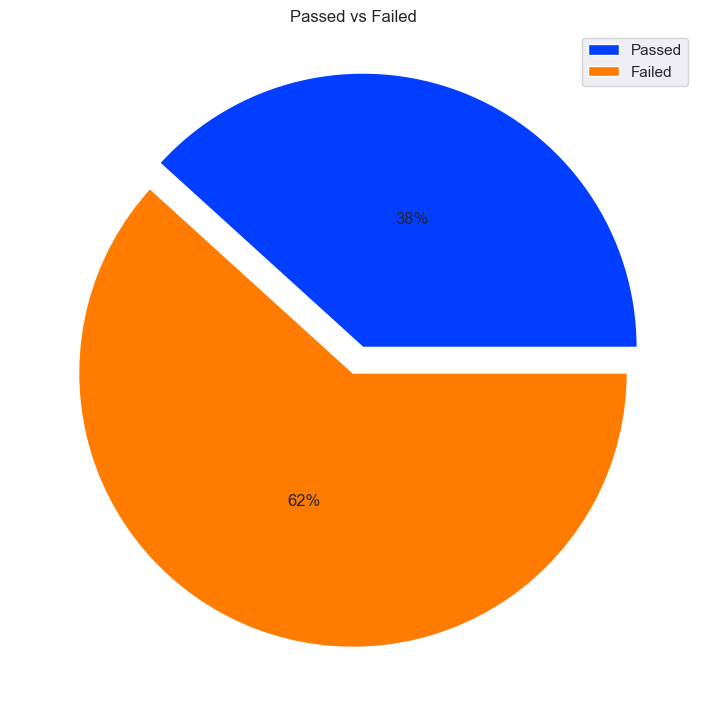

In [243]:
#Passed vs Failed
plt.figure(figsize=(7,7))
plt.style.use("_mpl-gallery")
pallet = sea.color_palette("bright")
data = [cleared_count, back_count]
plt.title("Passed vs Failed")
plt.pie(data, colors=pallet, autopct='%.0f%%', 
        explode=[0.1, 0.0], pctdistance=0.5 )
plt.legend(["Passed", "Failed"])


plt.show()

In [244]:
# Highest GPA per section
max_gpa_per_sec = current_clear_students_df.groupby(by="Section").agg({"Overall GPA": "max"})
current_clear_students_df.merge(max_gpa_per_sec, on=["Overall GPA", "Section"], how="inner").iloc[:,:-1]

,Name,Overall GPA,Section,Total Credits,Backlogs
0,WASIF ALI KHAN,8.57,CSE A,104.0,0.0
1,HASEEBA FATIMA,7.86,CSE B,104.0,0.0
2,MOHAMMED OMER,8.29,CSE C,104.0,0.0


In [245]:
# Number of students cleared per section
clear_per_section = current_clear_students_df.groupby(by="Section").agg({"Overall GPA": "count"}).rename(columns={"Overall GPA":"Passed"})
clear_per_section

,Passed
Section,
CSE A,38
CSE B,23
CSE C,14


In [246]:
# Total students who failed per Section
back_per_section = back_students_df.groupby(by="Section").agg({"Overall GPA": "count"}).rename(columns={"Overall GPA":"Failed"})
back_per_section

,Failed
Section,
CSE A,28
CSE B,43
CSE C,50


In [247]:
# Combining the two data frames 
section_data_merged = clear_per_section.join(back_per_section, on="Section")
section_data_merged

,Passed,Failed
Section,,
CSE A,38,28
CSE B,23,43
CSE C,14,50


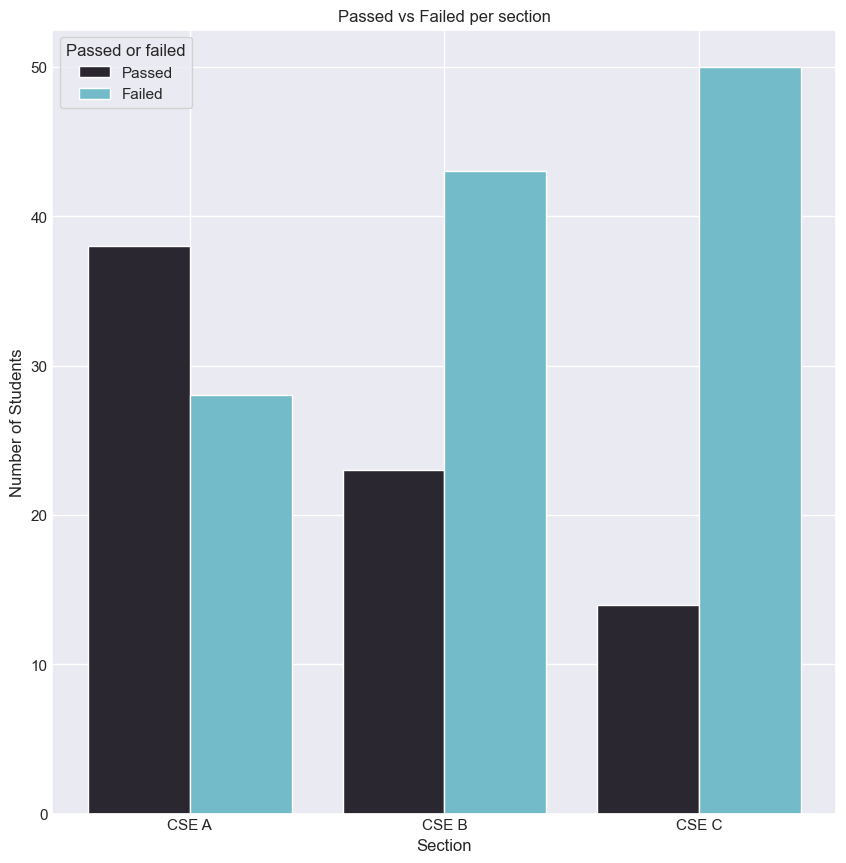

In [248]:
# Passed vs Failed per section
plt.style.use("_mpl-gallery")
x = np.arange(len(section_data_merged))

plt.figure(figsize=(8, 8))
plt.bar(x-0.2, section_data_merged["Passed"], 0.4, color="#2B2730")
plt.bar(x+0.2, section_data_merged["Failed"], 0.4, color='#73BBC9')
plt.xticks(x, section_data_merged.index)
plt.xlabel("Section")
plt.ylabel("Number of Students")
plt.legend(section_data_merged.columns, title="Passed or failed")
plt.title("Passed vs Failed per section")
plt.show()

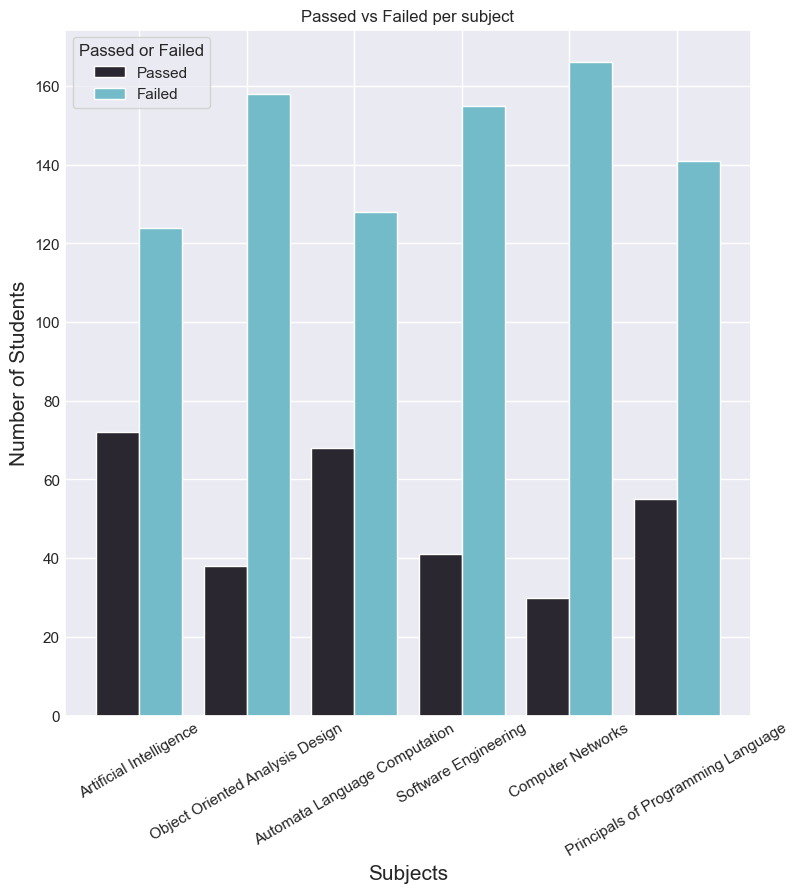

In [249]:
# Passed vs Failed per subject
subjects = list(subject_dic.values())[3:]
plt.figure(figsize=(7, 7))

cleared_subject_list = [len(clean_results_df[clean_results_df[subject] == 'F']) for subject in subjects]
failed_subject_list = [len(clean_results_df[clean_results_df[subject] != 'F']) for subject in subjects]

x = np.arange(len(subjects))

plt.bar(x-0.2,cleared_subject_list,width=0.4, color='#2B2730')
plt.bar(x+0.2,failed_subject_list,width=0.4, color='#73BBC9')
plt.xticks(x, subjects,rotation=30)
plt.xlabel("Subjects", fontsize=15)
plt.ylabel("Number of Students", fontsize=15)
plt.legend(["Passed", "Failed"], title="Passed or Failed")
plt.title("Passed vs Failed per subject")
plt.show()

In [250]:
credit_bin = pd.cut(x=compressed_results_df["Total Credits"], bins=[0, 84, 94 ,104], 
                    labels=["0 - 84 Credits", "84 - 94 Credits", "94 - 104 Credits"])
credit_divided = credit_bin.groupby(by=credit_bin.values).count()
credit_divided

0 - 84 Credits       52
84 - 94 Credits      30
94 - 104 Credits    114
Name: Total Credits, dtype: int64

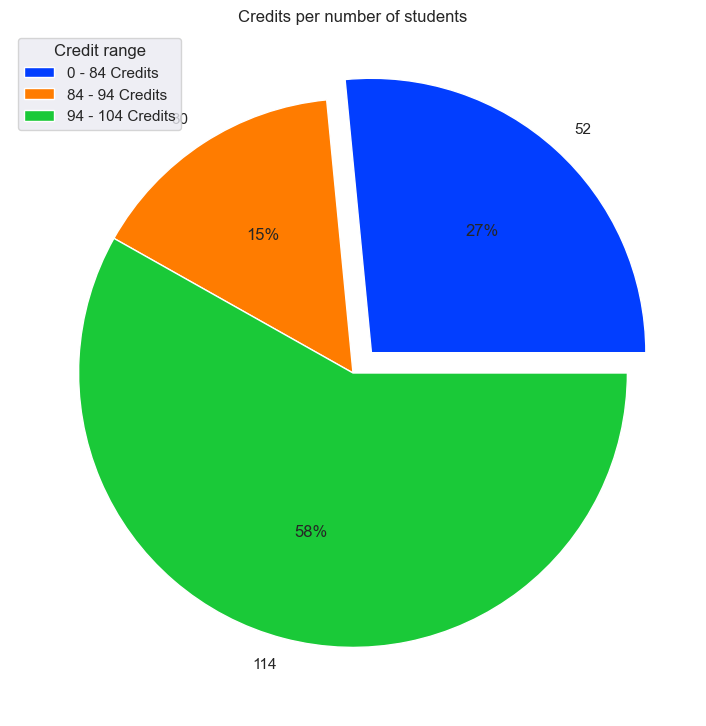

In [251]:
plt.figure(figsize=(7,7))
pallet = sea.color_palette("bright")
plt.pie(credit_divided.values, labels= credit_divided.values ,colors=pallet,
        explode = [0.1, 0.0, 0.0], autopct='%.0f%%')
plt.title("Credits per number of students")
plt.legend(credit_divided.index, title="Credit range")
plt.show()